In [4]:
# Allrights belong to Roy Amoyal
import cv2
import numpy as np



# Theory
Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation



##  Background Subtraction
    command: cv2.bgsegm.createBackgroundSubtractorMOG()

* BackgroundSubtractorMOG - It is a Gaussian Mixture-based Background/Foreground Segmentation Algorithm.

The Gaussian mixture model is a category of the probabilistic model which states that all                             generated data points are derived from a mixture of finite Gaussian distributions.

MOG uses a method to model each background pixel by a mixture of K Gaussian distributions (K is 3 to 5).
The weights of the mixture represent the amount of time that those colors were present in the scene.
The probable background colors are those which remain longer and more static.
It has some parameters (optional) like the number of Gaussian mixtures, length of history, threshold, etc.

### For Example in my project:
# 
<div>       
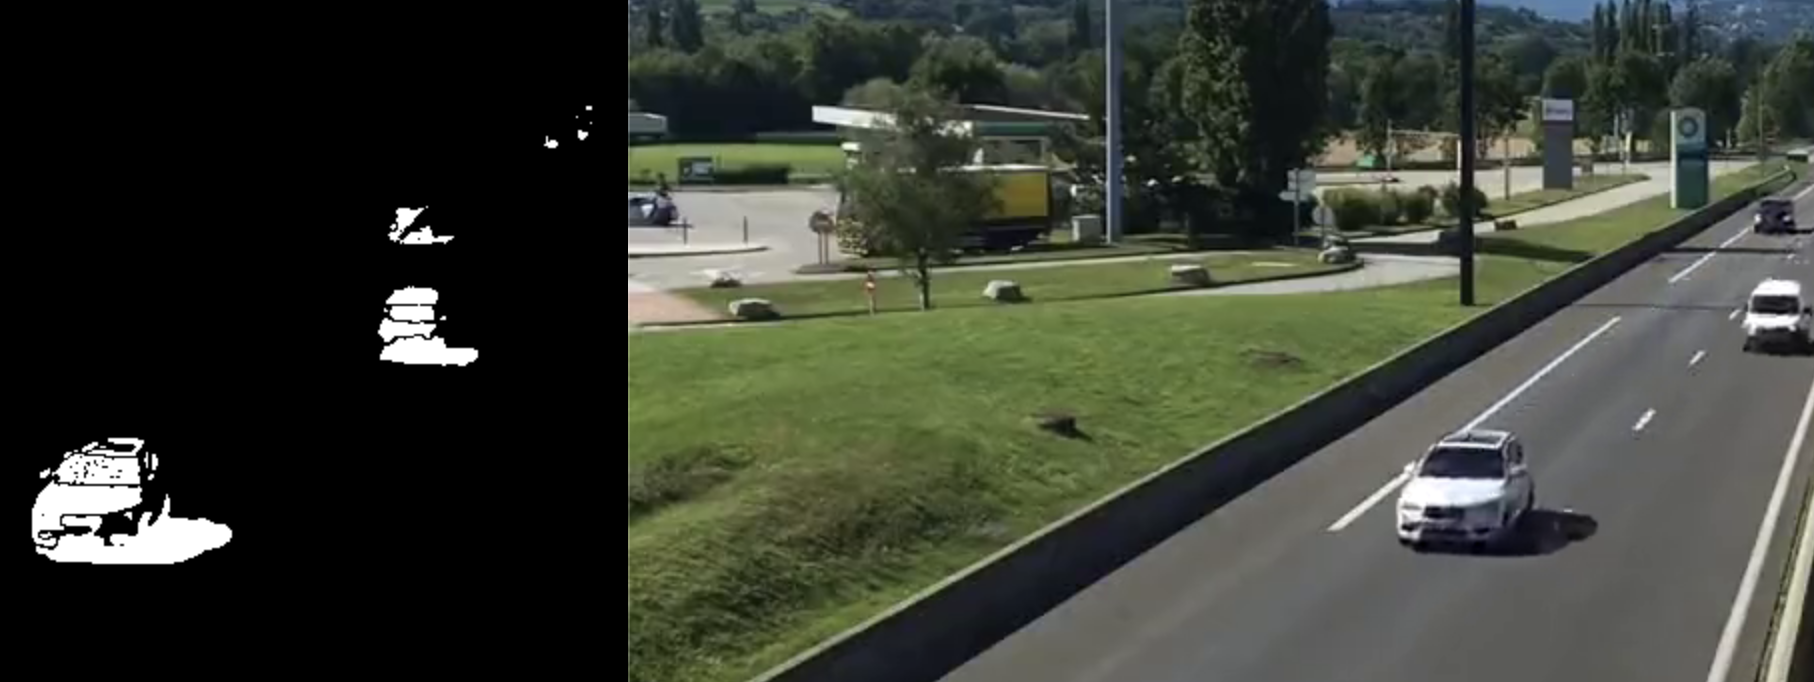
</div>

 ## Dilation (morphology) 
    command: cv2.dilate(img,kernel,iterations = 1)


Dilation (usually represented by ⊕) is one of the basic operations in mathematical morphology. Originally developed for binary images, it has been expanded first to grayscale images, and then to complete lattices. The dilation operation usually uses a structuring element for probing and **expanding the shapes contained in the input image.**

* a - original image
* b - dilation 
<div>
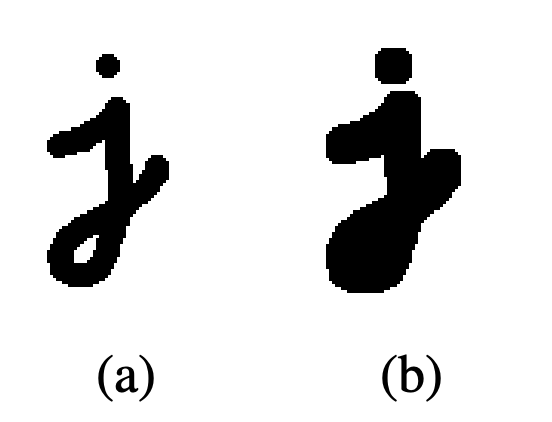
</div>

for full information (Erosion,Dilation,Opening,Closing and more) read from [here](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) (opencv site) 

notice: *In the command cv2.dilate(img,kernel,iterations = 1*, the bigger the iterations, the thickness is bigger. 

## Structuring Element
  
A structuring element is a matrix consisting of only 0's and 1's that can have any arbitrary shape and size. Typically are much smaller than the image being processed, while the pixels with values of 1 define the neighborhood.

Diffrent kind of Structuring Element:
<div>
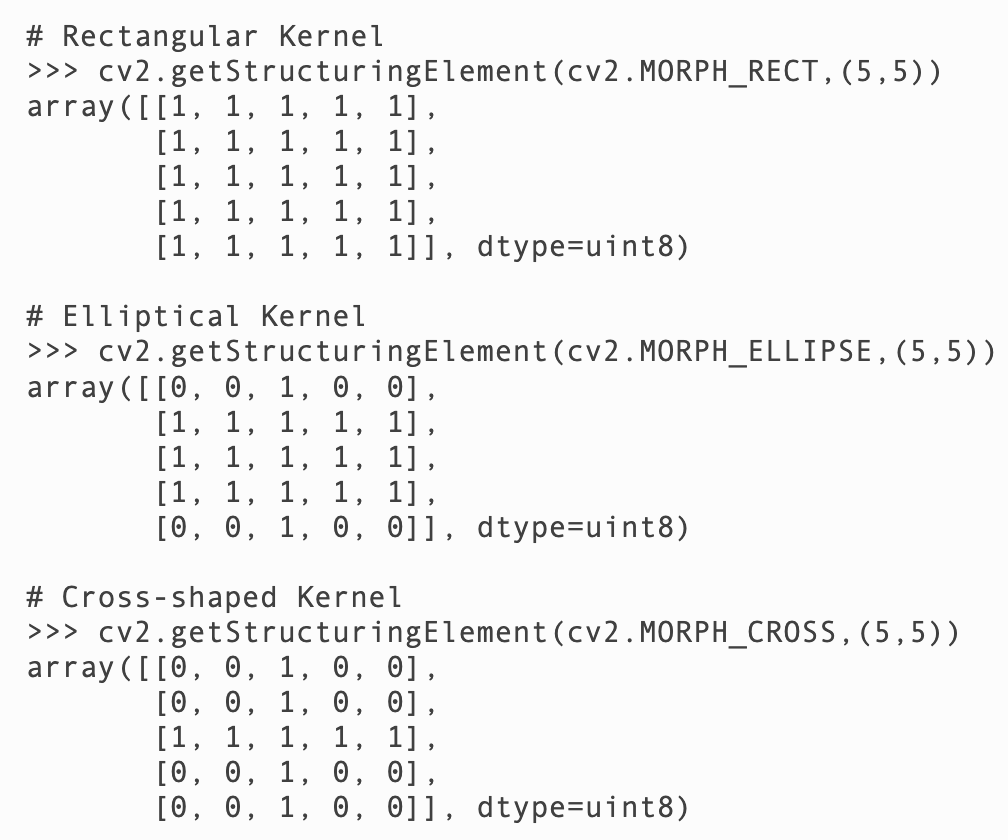
</div>

### Extracting the shapes by using the kernel/Structuring Element
    command: cv2.morphologyEx(dilat, cv2.MORPH_CLOSE, kernel) 
* we use MORPH_CLOSE because it is useful in closing small holes inside the foreground objects, or small black points on the object. (That's how we help to fullfill the cars shapes in the dilat image) 

Notice: **In this project we track cars so the best kernel(Structuring Element) we can use is MORPH_ELLIPSE or MORPH_RECT (becuase it is just make sense for the shape of the cars)**



OutCome:
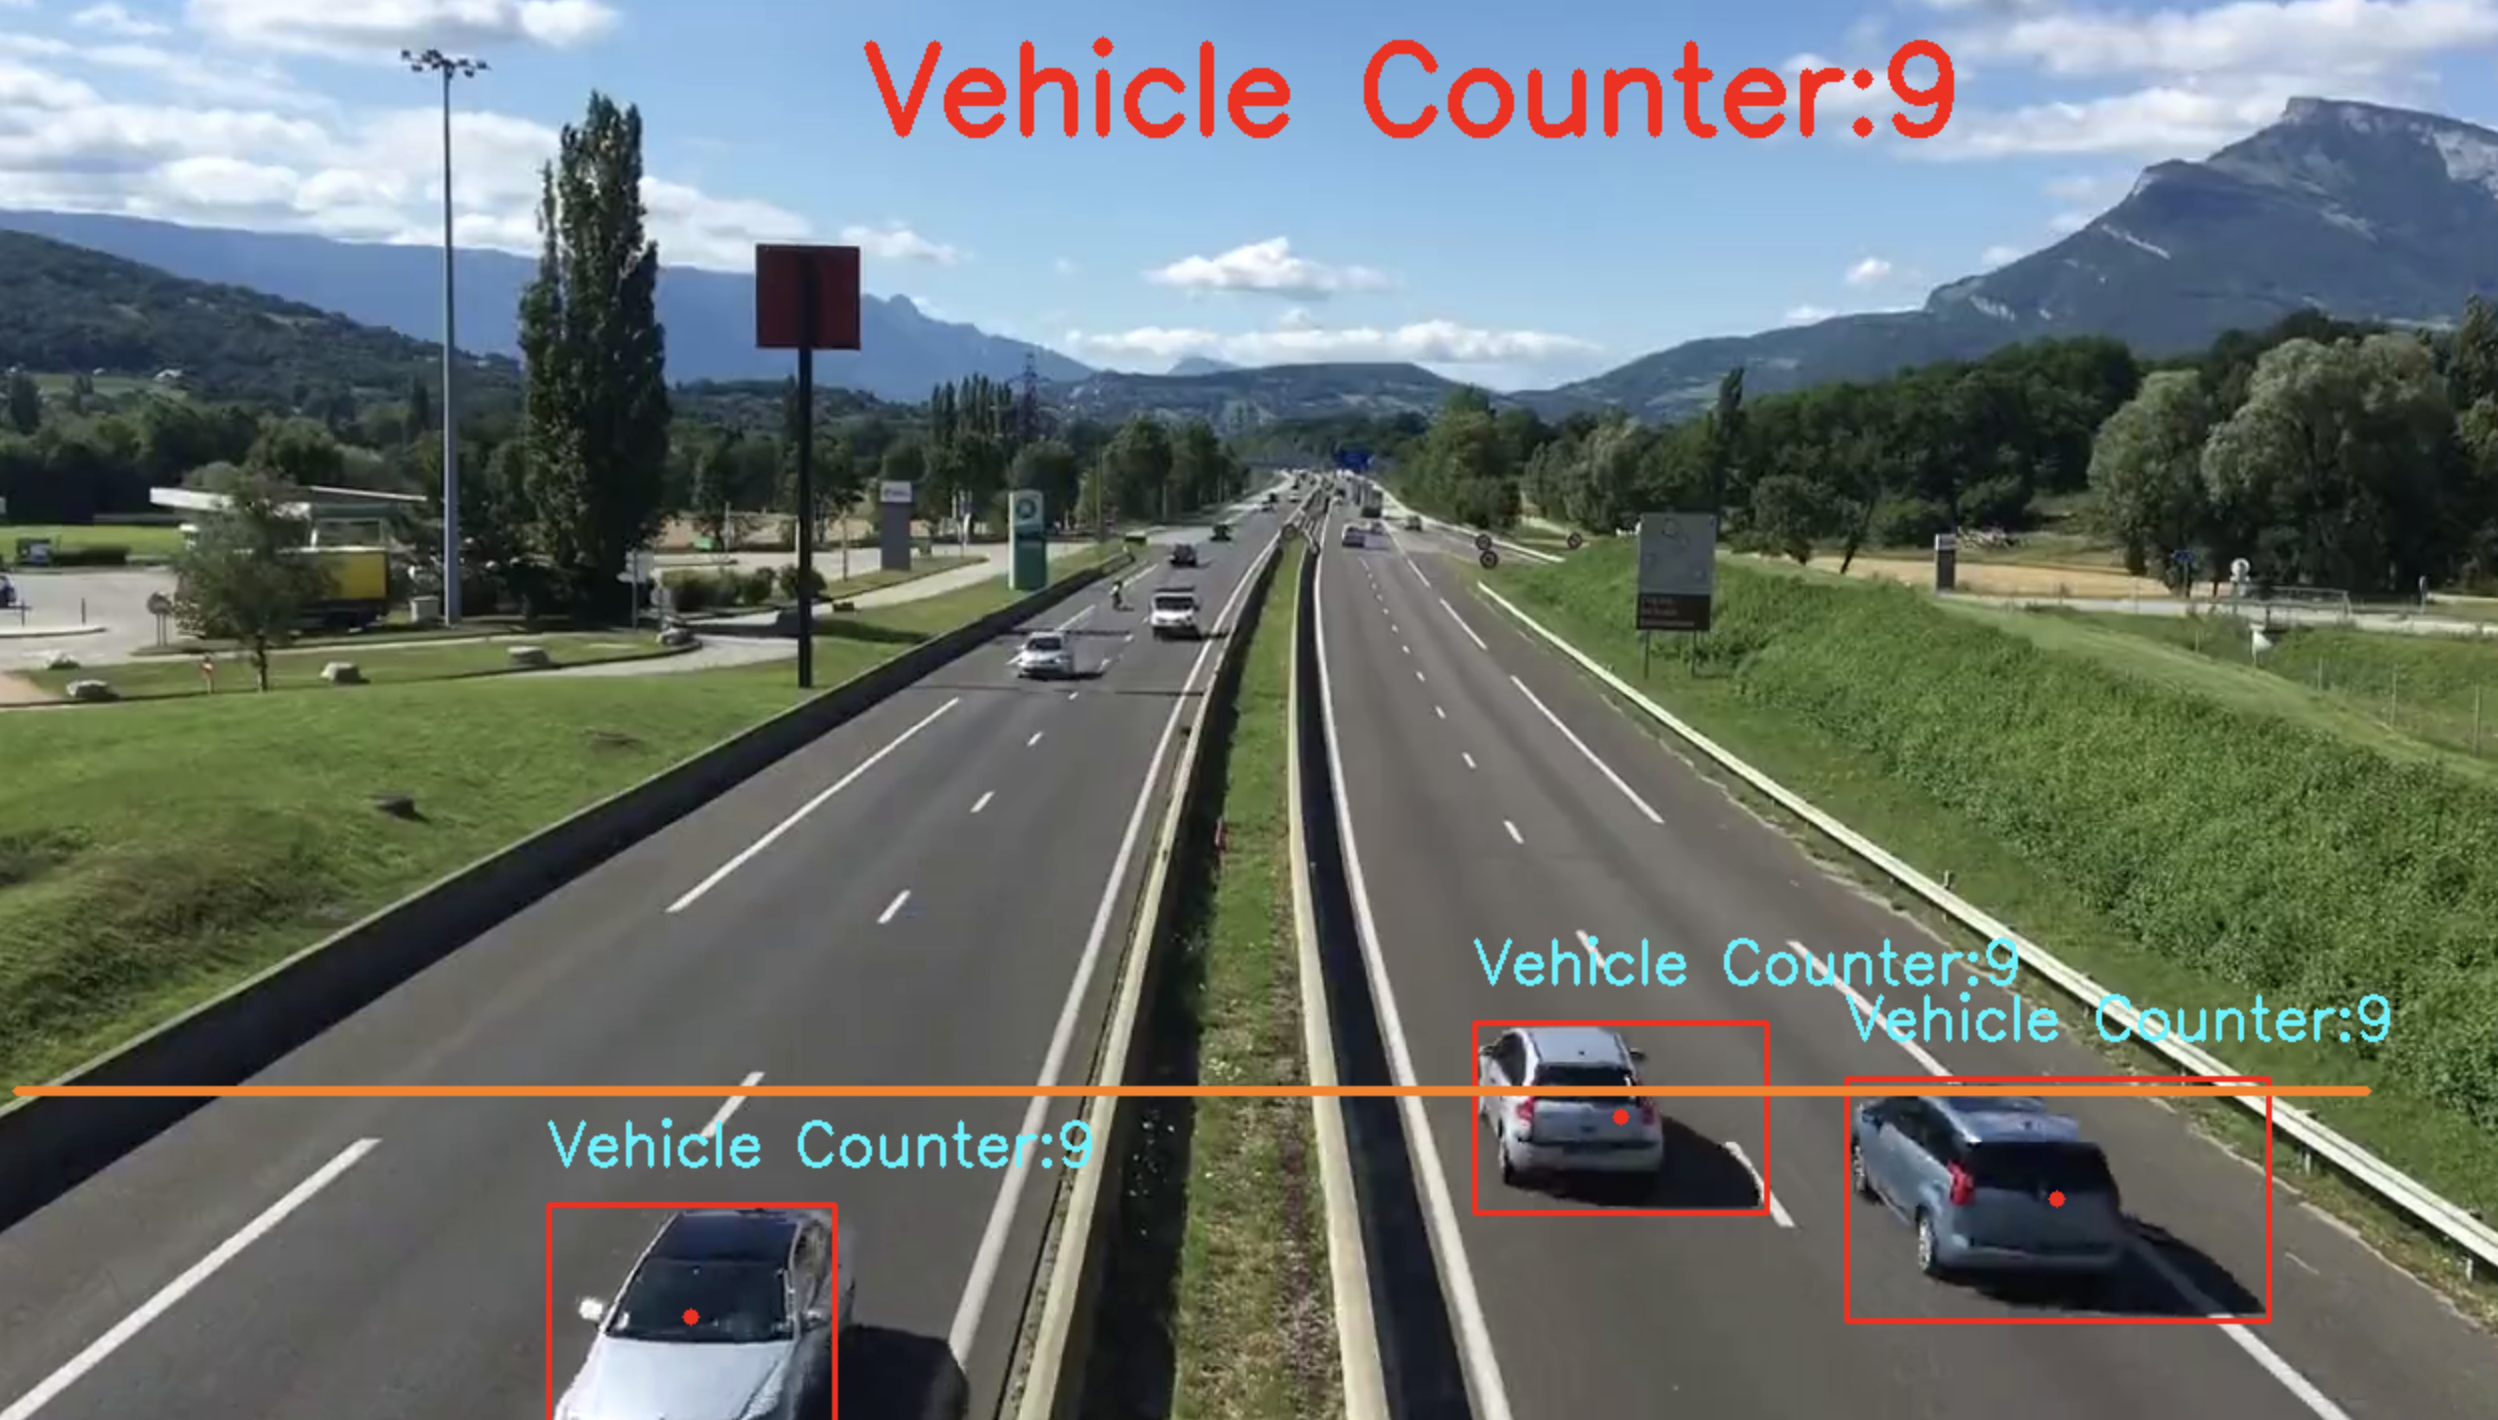


In [5]:
cap = cv2.VideoCapture('video.mp4')
# OpenCV provides Background Subtraction algorithms.
# we can perform background Subtraction using matrix subtraction, i.e, just subtracting the static frame from the video.
# But this has a lot of drawbacks.
# It is a very less efficient algorithm for Background subtraction because it does not update itself.
# This problemq is being handled by the Background Subtraction algorithms provided by OpenCV.

min_width_react = 80 # min width rectangle
min_height_react = 80 # min height rectangle
count_line_position = 550


#Initialize Substractor
algo = cv2.bgsegm.createBackgroundSubtractorMOG() # The best substractor for this project
#algo = cv2.createBackgroundSubtractorMOG() # Doesn't work very well



#algo = cv2.createBackgroundSubtractorMOG2() # working less better than MOG


def center_handle(x,y,w,h):
    x1 = int(w/2)
    y1 = int(h/2)
    cx = x + x1
    cy = y + y1
    return cx,cy

detect = []
offset = 6 #allowable error between pixels
counter = 0


while True:
    ret, frame1 = cap.read()
    
    grey = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(3,3), 5)
    # applying on each frame
    img_sub = algo.apply(blur)
    dilat = cv2.dilate(img_sub, np.ones((5,5))) # Dilation 
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    dilatada = cv2.morphologyEx(dilat, cv2.MORPH_CLOSE, kernel)
    
    contours,_ = cv2.findContours(dilatada,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2.imshow('Detector', dilatada)
    
    cv2.line(frame1,(25,count_line_position), (1200,count_line_position), (255,127,0), 3)
    
    for (i,c) in enumerate(contours):
        (x,y,w,h) = cv2.boundingRect(c)
        validate_counter = (w >= min_width_react) and (h >= min_height_react)
        if not validate_counter:
            continue
            
        cv2.rectangle(frame1, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.putText(frame1,"Vehicle Counter:" + str(counter),(x,y - 20), cv2.FONT_HERSHEY_SIMPLEX,1,(255,244,0), 2)
        
        
        
        center = center_handle(x,y,w,h)
        detect.append(center) 
        cv2.circle(frame1,center,4,(0,0,255),-1)
    
    
        for (x,y) in detect:
            if y < (count_line_position + offset) and y > (count_line_position - offset):
                counter += 1
            cv2.line(frame1,(25,count_line_position), (1200,count_line_position), (0,127,255), 3)
            detect.remove((x,y))
            #print("Vehicle Counter:" + str(counter))
            
    cv2.putText(frame1,"Vehicle Counter:" + str(counter),(450,70), cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),5)
    
    
    
    cv2.imshow('Original Video',frame1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
    
    
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()
    

